# SongKick API
We want to use the SongKickAPI to query concerts in a given area to generate a list of bands

Our key: wIKM4rEcfOjz07mp

In [128]:
import requests
import json
import matplotlib.pyplot as plt

In [95]:
# User information
user_city = 'boston'
user_state = 'ma'
user_country = 'us'
user_location = ','.join([user_city, user_state, user_country])

"""Get metro ID"""
resp = requests.get('https://api.songkick.com/api/3.0/search/locations.json', {'query': user_location, 'apikey': 'wIKM4rEcfOjz07mp'})
location_data = resp.json()
# Get locations from a search
locations = location_data['resultsPage']['results']['location']
for location in locations:
    # Is the state correct?
    location_state = location['city']['state']['displayName'].lower()
    location_city = location['city']['displayName'].lower()
    
    if (user_state == location_state) & (user_city in location_city):
        location_id = location['metroArea']['id']
        break
location_id

18842

In [170]:
"""Get performers"""
page = 1
all_events = []
concerts = []
artist_names = []
while True:
    resp = requests.get(f'https://api.songkick.com/api/3.0/metro_areas/{location_id}/calendar.json', {'apikey': 'wIKM4rEcfOjz07mp', 'max_date': '2020-05-24', 'page': page} )                    
    concert_data = resp.json()
    if not concert_data['resultsPage']['results']:
        break
    # Get concerts from a search
    events = concert_data['resultsPage']['results']['event']
    all_events.extend(events)

    for event in events:
        if event['type'] == 'Concert':
            concerts.append(event)
            #Get Performer(s) Name
            for performance in event['performance']:
                artist_names.append(performance['displayName'])
    page += 1

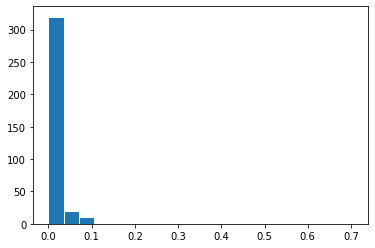

In [151]:
plt.hist([concert['popularity'] for concert in concerts], bins=20, ec='w')
plt.show()